# 掛載Google雲端硬碟

In [1]:
# 掛載使用者的Google雲端硬碟 (drive/MyDrive) 到 Colab 的工作磁碟
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import library

In [3]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib.font_manager import fontManager

# 建立Series (用List或Dict)

In [8]:
#用串列建立Series物件
foo_list = ['a', 'c', 'x', 'y']
foo_ser = pd.Series(foo_list)
# print(foo_ser)           #顯示Series
# print(foo_ser.values)    #顯示值
print(foo_ser.index)     #顯示索引
# foo_ser

RangeIndex(start=0, stop=4, step=1)


In [9]:
#用串列建立Series物件並自訂索引
company = ['聯電', '台積電', '聯發科']
stock_price = [42, 510, 694]
stock = pd.Series(stock_price, index=company)
stock
# print(stock.values)
# print(stock.index)

,0
聯電,42
台積電,510
聯發科,694


In [12]:
# 用Dict建立Series
dict1 = {'Taiwan': '台北', 'US': 'New York', 'Japan': 'Tokyo'}
city = pd.Series(dict1)
print(city)
city['Taiwan']

Taiwan          台北
US        New York
Japan        Tokyo
dtype: object


'台北'

# 讀取Series

In [14]:
#print(city)
print(city[2])        # get data by index
#print(city['Taiwan']) # get data by key
#print(city.index[0])  # get key
# city.index[0]

Tokyo


<ipython-input-14-62aacea0f711>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(city[2])        # get data by index


# 建立DataFrame (Dict 姓名 + 各科成績)

### 用List建立DataFrame

In [15]:
foo_list =  [[65,92,78,83,70],
             [90,72,76,93,56],
             [81,85,91,89,77],
             [79,53,47,94,80],
            ]
df = pd.DataFrame(foo_list)
# print(df.values)
# print(df.index)
df
# 缺row index 跟column label

,0,1,2,3,4
0,65,92,78,83,70
1,90,72,76,93,56
2,81,85,91,89,77
3,79,53,47,94,80


In [16]:
# 設定row index 跟column label
df = pd.DataFrame(foo_list,
                   index=['王小明','李小美','陳大同','林小玉'],
                   columns=['國文','英文','數學','自然','社會'])
df

,國文,英文,數學,自然,社會
王小明,65,92,78,83,70
李小美,90,72,76,93,56
陳大同,81,85,91,89,77
林小玉,79,53,47,94,80


### 用Dict建立DataFrame

In [29]:
# 以column為基礎的dict
scores = {'國文':{'王小明':65,'李小美':90,'陳大同':81,'林小玉':79},
          '英文':{'王小明':92,'李小美':72,'陳大同':85,'林小玉':53},
          '數學':{'王小明':78,'李小美':76,'陳大同':91,'林小玉':47},
          '自然':{'王小明':83,'李小美':93,'陳大同':89,'林小玉':94},
          '社會':{'王小明':70,'李小美':56,'陳大同':77,'林小玉':80}}
df = pd.DataFrame(scores)
df

,國文,英文,數學,自然,社會
王小明,65,92,78,83,70
李小美,90,72,76,93,56
陳大同,81,85,91,89,77
林小玉,79,53,47,94,80


###用Array建立DataFrame

In [19]:
mydata = np.random.randn(4, 3)
mydata

array([[ 0.06680553,  1.22960939, -2.80630801],
       [-0.23864964, -0.56008067, -1.98492875],
       [-0.04119635, -1.12338671, -0.98101969],
       [ 1.80762799, -2.09190242, -0.0631304 ]])

In [23]:
df = pd.DataFrame(mydata, columns=list("ABC"), index=list("甲乙丙丁"))
df

,A,B,C
甲,0.066806,1.229609,-2.806308
乙,-0.238650,-0.560081,-1.984929
丙,-0.041196,-1.123387,-0.981020
丁,1.807628,-2.091902,-0.063130


## 了解DataFrame的結構

In [24]:
print(df.shape)
print(df.dtypes)

(4, 3)
A    float64
B    float64
C    float64
dtype: object


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 甲 to 丁
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       4 non-null      float64
 1   B       4 non-null      float64
 2   C       4 non-null      float64
dtypes: float64(3)
memory usage: 300.0+ bytes


In [26]:
df.describe()

,A,B,C
count,4.000000,4.000000,4.000000
mean,0.398647,-0.636440,-1.458847
std,0.947797,1.395643,1.192862
min,-0.238650,-2.091902,-2.806308
25%,-0.090560,-1.365516,-2.190274
50%,0.012805,-0.841734,-1.482974
75%,0.502011,-0.112658,-0.751547
max,1.807628,1.229609,-0.063130


## 合併兩個DataFrame

In [27]:
scores_others = {'體育':{'王小明':90,'李小美':93,'陳大同':95,'林小玉':80},
          '家政':{'王小明':70,'李小美':80,'陳大同':75,'林小玉':90},}
df_others = pd.DataFrame(scores_others)
df_others

,體育,家政
王小明,90,70
李小美,93,80
陳大同,95,75
林小玉,80,90


In [ ]:
df_all = pd.concat([df, df_others], axis=1)
df_all

,國文,英文,數學,自然,社會,體育,家政
王小明,65,92,78,83,70,90,70
李小美,90,72,76,93,56,93,80
陳大同,81,85,91,89,77,95,75
林小玉,79,53,47,94,80,80,90


In [ ]:
mydata = np.random.randn(4, 3)
df1 = pd.DataFrame(mydata, columns=list("ABC"))
df1

,A,B,C
0,0.601519,-0.546633,0.501732
1,-1.490353,0.228789,0.491885
2,-0.977317,-0.099722,-1.259003
3,-0.267223,0.783447,0.103293


In [ ]:
df2 = pd.DataFrame(np.random.randn(3, 3), columns=list("ABC"))
df2

,A,B,C
0,-0.672493,-0.745909,-1.120849
1,-0.351209,-1.367193,-0.657073
2,0.910339,-0.519459,-1.308744


In [ ]:
#上下合併沒什麼問題
df3 = pd.concat([df1, df2], axis=0)
df3

,A,B,C
0,0.601519,-0.546633,0.501732
1,-1.490353,0.228789,0.491885
2,-0.977317,-0.099722,-1.259003
3,-0.267223,0.783447,0.103293
0,-0.672493,-0.745909,-1.120849
1,-0.351209,-1.367193,-0.657073
2,0.910339,-0.519459,-1.308744


In [ ]:
#把 index 重新整理
df3.index = range(7)
df3

,A,B,C
0,0.601519,-0.546633,0.501732
1,-1.490353,0.228789,0.491885
2,-0.977317,-0.099722,-1.259003
3,-0.267223,0.783447,0.103293
4,-0.672493,-0.745909,-1.120849
5,-0.351209,-1.367193,-0.657073
6,0.910339,-0.519459,-1.308744


In [ ]:
# 左右合併還是可以，不過因為形狀不同，所以會出現NaN。
df4 = pd.concat([df1, df2], axis=1)
df4

,A,B,C,A,B,C
0,0.601519,-0.546633,0.501732,-0.672493,-0.745909,-1.120849
1,-1.490353,0.228789,0.491885,-0.351209,-1.367193,-0.657073
2,-0.977317,-0.099722,-1.259003,0.910339,-0.519459,-1.308744
3,-0.267223,0.783447,0.103293,NaN,NaN,NaN


# 讀取DataFrame

## 以欄位取值 df[column]

In [30]:
df

,國文,英文,數學,自然,社會
王小明,65,92,78,83,70
李小美,90,72,76,93,56
陳大同,81,85,91,89,77
林小玉,79,53,47,94,80


In [33]:
foo = df['自然']
foo
print(type(foo))

<class 'pandas.core.series.Series'>


In [ ]:
#讀一個欄位
df["自然"]
#df["自然"].dtype
#print(type(df["自然"]))

,自然
王小明,83
李小美,93
陳大同,89
林小玉,94


In [34]:
#讀多個欄位
df['國文']                 #series
df[['國文']]               #dataframe
df[['國文','英文','數學']] #dataframe

#a4 = df['王小明']               #error

,國文,英文,數學
王小明,65,92,78
李小美,90,72,76
陳大同,81,85,91
林小玉,79,53,47


## 以index label及column name取值：df.loc()

In [35]:
df

,國文,英文,數學,自然,社會
王小明,65,92,78,83,70
李小美,90,72,76,93,56
陳大同,81,85,91,89,77
林小玉,79,53,47,94,80


In [37]:
print(df.loc["林小玉", "社會"]) # int
type(df.loc["林小玉", "社會"])

80


numpy.int64

In [39]:
df.loc["王小明", ["國文","社會"]] # Series
print(type(df.loc["王小明", ["國文","社會"]]))

<class 'pandas.core.series.Series'>


In [ ]:
df.loc[["王小明", "李小美"], ["數學", "自然"]] # DataFrame

,數學,自然
王小明,78,83
李小美,76,93


In [ ]:
df.loc["王小明":"陳大同", "數學":"社會"] # DataFrame

,數學,自然,社會
王小明,78,83,70
李小美,76,93,56
陳大同,91,89,77


In [ ]:
df.loc["陳大同", :] # Series

,陳大同
國文,81
英文,85
數學,91
自然,89
社會,77


In [ ]:
df.loc[:"李小美", "數學":"社會"] # DataFrame

,數學,自然,社會
王小明,78,83,70
李小美,76,93,56


In [ ]:
df.loc["李小美":, "數學":"社會"]

,數學,自然,社會
李小美,76,93,56
陳大同,91,89,77
林小玉,47,94,80


## 以index ID及column ID取值：df.iloc()

In [40]:
df

,國文,英文,數學,自然,社會
王小明,65,92,78,83,70
李小美,90,72,76,93,56
陳大同,81,85,91,89,77
林小玉,79,53,47,94,80


In [ ]:
df.iloc[3, 4]

80

In [ ]:
df.iloc[0, [0, 4]]
#type(df.iloc[0, [0, 4]])

,王小明
國文,65
社會,70


In [ ]:
df.iloc[[0, 1], [2, 3]]
#type(df.iloc[[0, 1], [2, 3]])

,數學,自然
王小明,78,83
李小美,76,93


In [ ]:
df.iloc[0:3, 2:5]

,數學,自然,社會
王小明,78,83,70
李小美,76,93,56
陳大同,91,89,77


In [ ]:
df.iloc[2, :]

,陳大同
國文,81
英文,85
數學,91
自然,89
社會,77


In [ ]:
df.iloc[:2, 2:5]

,數學,自然,社會
王小明,78,83,70
李小美,76,93,56


In [ ]:
df.iloc[1:, 2:5]

,數學,自然,社會
李小美,76,93,56
陳大同,91,89,77
林小玉,47,94,80


## 最前或最後幾列資料

In [ ]:
df.head(3)

,國文,英文,數學,自然,社會
王小明,65,92,78,83,70
李小美,90,72,76,93,56
陳大同,81,85,91,89,77


In [ ]:
df.tail(2)

,國文,英文,數學,自然,社會
陳大同,81,85,91,89,77
林小玉,79,53,47,94,80


## 資料排序

In [ ]:
df.sort_values(by="國文", ascending=False, inplace=True)

In [ ]:
df

,國文,英文,數學,自然,社會
李小美,90,72,76,93,56
陳大同,81,85,91,89,77
林小玉,79,53,47,94,80
王小明,65,92,78,83,70


In [ ]:
df

,國文,英文,數學,自然,社會
王小明,65,92,78,83,70
李小美,90,72,76,93,56
陳大同,81,85,91,89,77
林小玉,79,53,47,94,80


In [ ]:
df.sort_index(axis=0)

,國文,數學,社會,自然,英文
王小明,65,78,70,83,92
李小美,90,76,56,93,72
陳大同,81,91,77,89,85
林小玉,79,47,80,94,53


## 條件取值

In [44]:
df

,國文,英文,數學,自然,社會
王小明,65,92,78,83,70
李小美,90,72,76,93,56
陳大同,81,85,91,89,77
林小玉,79,53,47,94,80


df["數學"]<60 ===> [False, False, False, True] ==> df([False, False, False, True])

In [42]:
#指定欄位以條件式判斷取值
df[df["數學"] < 60]
#boolean indexing: Using boolean array (series) to index select rows
# c1 = pd.Series([False, True, True, False])
# c1 = df[[False, True, True, False]]  #不取row0&3, 取row1&2, dataframe
# df["國文"] >= 80
# c2 = df['國文'] >= 80                 #series
# c3 = df[df['國文'] >= 80]            # dataframe

,國文,英文,數學,自然,社會
林小玉,79,53,47,94,80


#以values取值

In [ ]:
d1 = df.values              #Numpy ndarray
d1

array([[65, 92, 78, 83, 70],
       [90, 72, 76, 93, 56],
       [81, 85, 91, 89, 77],
       [79, 53, 47, 94, 80]])

# 修改DataFrame

In [46]:
df

,國文,英文,數學,自然,社會
王小明,65,92,78,83,70
李小美,90,72,76,93,56
陳大同,81,85,91,89,77
林小玉,79,53,47,94,80


In [47]:
dfcopy=df.copy()  # 複製原始資料

In [48]:
df.loc["王小明", "數學"] = 95  # 修改資料
df

,國文,英文,數學,自然,社會
王小明,65,92,95,83,70
李小美,90,72,76,93,56
陳大同,81,85,91,89,77
林小玉,79,53,47,94,80


In [49]:
df.loc["王小明", :] = 80  # 修改資料
df

,國文,英文,數學,自然,社會
王小明,80,80,80,80,80
李小美,90,72,76,93,56
陳大同,81,85,91,89,77
林小玉,79,53,47,94,80


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 王小明 to 林小玉
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   國文      4 non-null      int64
 1   英文      4 non-null      int64
 2   數學      4 non-null      int64
 3   自然      4 non-null      int64
 4   社會      4 non-null      int64
dtypes: int64(5)
memory usage: 364.0+ bytes


In [51]:
import numpy as np
df["國文"] = df["國文"].astype(np.int8)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 王小明 to 林小玉
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   國文      4 non-null      int8 
 1   英文      4 non-null      int64
 2   數學      4 non-null      int64
 3   自然      4 non-null      int64
 4   社會      4 non-null      int64
dtypes: int64(4), int8(1)
memory usage: 336.0+ bytes


In [52]:
df.rename(columns = {"英文":"外語"}, inplace=True)
df

,國文,外語,數學,自然,社會
王小明,80,80,80,80,80
李小美,90,72,76,93,56
陳大同,81,85,91,89,77
林小玉,79,53,47,94,80


In [53]:
df["總分"] = df["國文"] + df["外語"] + df["數學"] + df["自然"] + df["社會"]
df

,國文,外語,數學,自然,社會,總分
王小明,80,80,80,80,80,400
李小美,90,72,76,93,56,387
陳大同,81,85,91,89,77,423
林小玉,79,53,47,94,80,353


In [54]:
df=dfcopy #還原 DataFrame 資料
df

,國文,英文,數學,自然,社會
王小明,65,92,78,83,70
李小美,90,72,76,93,56
陳大同,81,85,91,89,77
林小玉,79,53,47,94,80


# 刪除 DataFrame 資料

In [ ]:
dfcopy=df.copy()  # 複製原始資料
df.drop("王小明", axis = 0)          #CRUD Create, Read, Update, Delete

In [ ]:
df = dfcopy
df.drop("數學", axis=1)

In [ ]:
dfcopy=df.copy()
dfcopy.drop(["數學", "自然"], axis=1)

In [ ]:
df = dfcopy
df.drop(df.index[1:4])

In [ ]:
dfcopy=df.copy()
dfcopy.drop(dfcopy.columns[1:4], axis=1)

# 讀寫外部檔案

In [55]:
df

,國文,英文,數學,自然,社會
王小明,65,92,78,83,70
李小美,90,72,76,93,56
陳大同,81,85,91,89,77
林小玉,79,53,47,94,80


In [ ]:
# 寫到CSV檔案
df.to_csv("/content/drive/MyDrive/Pandas/scores.csv", encoding='utf-8-sig')

In [ ]:
# 讀CSV檔案
df = pd.read_csv("/content/drive/MyDrive/Pandas/covid19.csv")
df

In [ ]:
# 讀JSON檔案
df = pd.read_json('/content/drive/MyDrive/Pandas/covid19.json')
df

In [56]:
# 讀Excel試算表
df = pd.read_excel('/content/drive/MyDrive/Pandas/covid19.xlsx')
df

,country_ch,country_en,cases,deaths
0,美國,United States,76407539,923087
1,印度,India,42272014,502874
2,巴西,Brazil,26599593,632621
3,法國,France,20804372,132923
4,英國,United Kingdom,17866632,158363
...,...,...,...,...
193,東加,Tonga,8,0
194,萬那杜,Vanuatu,7,1
195,馬紹爾群島,Marshall Islands,7,0
196,密克羅尼西亞聯邦,Micronesia,1,0


# 資料清洗 (Customer.csv)

## 查詢空值：isnull()


In [60]:
import pandas as pd
# 讀取資料
df = pd.read_csv('/content/drive/MyDrive/Pandas/customer.csv')
df
# 空值的處理
print('各個欄位有空值的狀況:')
print(df.isnull())
print(df.isnull().sum())
#print(df.isnull().any(axis=1))
# print('有空值的記錄筆數:', df.isnull().any(axis=1).sum())
# print(df.isnull().any(axis=0))
# print('有空值的欄位數:', df.isnull().any(axis=0).sum())
# print('age欄有空值的記錄:')
# print(df[df['age'].isnull()])

各個欄位有空值的狀況:
       id   name  gender    age   area    job
0   False  False   False  False  False  False
1   False  False    True   True  False  False
2   False  False    True   True  False  False
3   False  False   False  False  False  False
4   False  False   False  False  False  False
5   False  False   False  False  False  False
6   False  False    True   True   True  False
7   False  False    True  False   True  False
8   False  False    True  False   True  False
9   False  False    True  False  False  False
10  False  False    True  False  False  False
11  False  False   False  False  False  False
12  False  False   False  False  False  False
13  False  False    True  False  False  False
14  False  False   False  False  False  False
id        0
name      0
gender    8
age       3
area      3
job       0
dtype: int64


## 空欄填值：fillna()

In [62]:
df

,id,name,gender,age,area,job
0,1700001,李國發,Male,21.0,新北市三重區,金融業 和房地產
1,1700002,吳俊諺,NaN,NaN,臺北市文山區,金融業和房地產
2,1700003,蔡俊毅,NaN,NaN,臺北市文山區,教育體育 文化
3,1700004,姚鈺迪,Female,34.0,基隆市中正區,住宿 和 餐飲業
4,1700004,姚鈺迪,Female,34.0,基隆市中正區,住宿和餐飲業
5,1700005,袁劭彥,Male,42.0,臺北市文山區,金融業和房地產
6,1700006,蔡登意,NaN,NaN,NaN,金融業和房地產
7,1700007,吳景翔,NaN,39.0,NaN,農林牧漁業
8,1700008,邱孝信,NaN,39.0,NaN,金融業和房地產
9,1700009,陳明輝,NaN,57.0,基隆市中正區,金融業和房地產


In [61]:
# 將age的空值填入0
df_sample = df.copy()
df_sample['age'] = df_sample['age'].fillna(value=0)
df_sample.head()

,id,name,gender,age,area,job
0,1700001,李國發,Male,21.0,新北市三重區,金融業 和房地產
1,1700002,吳俊諺,NaN,0.0,臺北市文山區,金融業和房地產
2,1700003,蔡俊毅,NaN,0.0,臺北市文山區,教育體育 文化
3,1700004,姚鈺迪,Female,34.0,基隆市中正區,住宿 和 餐飲業
4,1700004,姚鈺迪,Female,34.0,基隆市中正區,住宿和餐飲業


In [63]:
# 將age的空值填入平均值
df_sample = df.copy()
df_sample['age'] = df_sample['age'].fillna(
                    value=df_sample['age'].mean())
df_sample.head()

,id,name,gender,age,area,job
0,1700001,李國發,Male,21.0,新北市三重區,金融業 和房地產
1,1700002,吳俊諺,NaN,45.0,臺北市文山區,金融業和房地產
2,1700003,蔡俊毅,NaN,45.0,臺北市文山區,教育體育 文化
3,1700004,姚鈺迪,Female,34.0,基隆市中正區,住宿 和 餐飲業
4,1700004,姚鈺迪,Female,34.0,基隆市中正區,住宿和餐飲業


In [64]:
# 以前一個值往下填ffill或後一個值往上填bfill
df_sample['gender'] = df_sample['gender'].fillna(method='ffill')
df_sample['area'] = df_sample['area'].fillna(method='ffill')
df_sample.head(10)

<ipython-input-64-e81483c83c62>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_sample['gender'] = df_sample['gender'].fillna(method='ffill')
<ipython-input-64-e81483c83c62>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_sample['area'] = df_sample['area'].fillna(method='ffill')


,id,name,gender,age,area,job
0,1700001,李國發,Male,21.0,新北市三重區,金融業 和房地產
1,1700002,吳俊諺,Male,45.0,臺北市文山區,金融業和房地產
2,1700003,蔡俊毅,Male,45.0,臺北市文山區,教育體育 文化
3,1700004,姚鈺迪,Female,34.0,基隆市中正區,住宿 和 餐飲業
4,1700004,姚鈺迪,Female,34.0,基隆市中正區,住宿和餐飲業
5,1700005,袁劭彥,Male,42.0,臺北市文山區,金融業和房地產
6,1700006,蔡登意,Male,45.0,臺北市文山區,金融業和房地產
7,1700007,吳景翔,Male,39.0,臺北市文山區,農林牧漁業
8,1700008,邱孝信,Male,39.0,臺北市文山區,金融業和房地產
9,1700009,陳明輝,Male,57.0,基隆市中正區,金融業和房地產


In [66]:
# 刪除不完整的資料
df.dropna().shape

(7, 6)

## 去除重複資料

In [67]:
df

,id,name,gender,age,area,job
0,1700001,李國發,Male,21.0,新北市三重區,金融業 和房地產
1,1700002,吳俊諺,NaN,NaN,臺北市文山區,金融業和房地產
2,1700003,蔡俊毅,NaN,NaN,臺北市文山區,教育體育 文化
3,1700004,姚鈺迪,Female,34.0,基隆市中正區,住宿 和 餐飲業
4,1700004,姚鈺迪,Female,34.0,基隆市中正區,住宿和餐飲業
5,1700005,袁劭彥,Male,42.0,臺北市文山區,金融業和房地產
6,1700006,蔡登意,NaN,NaN,NaN,金融業和房地產
7,1700007,吳景翔,NaN,39.0,NaN,農林牧漁業
8,1700008,邱孝信,NaN,39.0,NaN,金融業和房地產
9,1700009,陳明輝,NaN,57.0,基隆市中正區,金融業和房地產


In [68]:
# 去除重複的記錄
df_sample.drop_duplicates(subset='id', keep='first', inplace=True)
df_sample.head()

,id,name,gender,age,area,job
0,1700001,李國發,Male,21.0,新北市三重區,金融業 和房地產
1,1700002,吳俊諺,Male,45.0,臺北市文山區,金融業和房地產
2,1700003,蔡俊毅,Male,45.0,臺北市文山區,教育體育 文化
3,1700004,姚鈺迪,Female,34.0,基隆市中正區,住宿 和 餐飲業
5,1700005,袁劭彥,Male,42.0,臺北市文山區,金融業和房地產


## 資料內容的置換

整數字面值
浮點數字面值

In [69]:
# 去除欄位中的空白
df_sample['job'] = df_sample['job'].str.strip()
df_sample['job'] = df_sample['job'].str.replace(' ', '')
df_sample.head()

,id,name,gender,age,area,job
0,1700001,李國發,Male,21.0,新北市三重區,金融業和房地產
1,1700002,吳俊諺,Male,45.0,臺北市文山區,金融業和房地產
2,1700003,蔡俊毅,Male,45.0,臺北市文山區,教育體育文化
3,1700004,姚鈺迪,Female,34.0,基隆市中正區,住宿和餐飲業
5,1700005,袁劭彥,Male,42.0,臺北市文山區,金融業和房地產


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      15 non-null     int64  
 1   name    15 non-null     object 
 2   gender  7 non-null      object 
 3   age     12 non-null     float64
 4   area    12 non-null     object 
 5   job     15 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 848.0+ bytes


## 調整資料的格式

In [71]:
# 轉換值的格式
df_sample['age'] = df_sample['age'].astype('int8')
df_sample.head()
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 0 to 14
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      14 non-null     int64 
 1   name    14 non-null     object
 2   gender  14 non-null     object
 3   age     14 non-null     int8  
 4   area    14 non-null     object
 5   job     14 non-null     object
dtypes: int64(1), int8(1), object(4)
memory usage: 686.0+ bytes


# 資料篩選

In [72]:
# 篩選女性的資料
df_sample[(df_sample['gender'] == 'Female')]

,id,name,gender,age,area,job
3,1700004,姚鈺迪,Female,34,基隆市中正區,住宿和餐飲業
11,1700011,許合蓉,Female,61,新北市三重區,住宿和餐飲業
14,1700014,周聿綠,Female,57,基隆市中正區,金融業和房地產


In [74]:
# 篩選男性且大於50歲的資料
# print(df_sample[(df_sample['gender'] == 'Male') & (df_sample['age'] > 50)])

# 篩選住在新北市三重區或基隆市中正區的資料
print(df_sample[(df_sample['area'] == '新北市三重區') | (df_sample['area'] == '基隆市中正區')])

         id name  gender  age    area      job
0   1700001  李國發    Male   21  新北市三重區  金融業和房地產
3   1700004  姚鈺迪  Female   34  基隆市中正區   住宿和餐飲業
9   1700009  陳明輝    Male   57  基隆市中正區  金融業和房地產
10  1700010  彭郁翔    Male   55  基隆市中正區   住宿和餐飲業
11  1700011  許合蓉  Female   61  新北市三重區   住宿和餐飲業
12  1700012  武家豪    Male   53  新北市三重區    農林牧漁業
13  1700013  郭信邦    Male   48  新北市三重區   教育體育文化
14  1700014  周聿綠  Female   57  基隆市中正區  金融業和房地產


In [76]:
df

,id,name,gender,age,area,job
0,1700001,李國發,Male,21.0,新北市三重區,金融業 和房地產
1,1700002,吳俊諺,NaN,NaN,臺北市文山區,金融業和房地產
2,1700003,蔡俊毅,NaN,NaN,臺北市文山區,教育體育 文化
3,1700004,姚鈺迪,Female,34.0,基隆市中正區,住宿 和 餐飲業
4,1700004,姚鈺迪,Female,34.0,基隆市中正區,住宿和餐飲業
5,1700005,袁劭彥,Male,42.0,臺北市文山區,金融業和房地產
6,1700006,蔡登意,NaN,NaN,NaN,金融業和房地產
7,1700007,吳景翔,NaN,39.0,NaN,農林牧漁業
8,1700008,邱孝信,NaN,39.0,NaN,金融業和房地產
9,1700009,陳明輝,NaN,57.0,基隆市中正區,金融業和房地產


In [79]:
df['area'].unique()

array(['新北市三重區', '臺北市文山區', '基隆市中正區', nan], dtype=object)

In [80]:
df.value_counts('area')

,count
area,
基隆市中正區,5
新北市三重區,4
臺北市文山區,3


In [ ]:
def get_last_name(full_name):
    return full_name[0]
df['last_name'] = df['name'].apply(get_last_name)
df

# 資料分組運算: groupby, agg

In [83]:
#客戶中男女生的平均年齡
# df_sample['age'].mean()
df_sample.groupby('gender')['age'].mean()

,age
gender,
Female,50.666667
Male,44.454545


In [84]:
#客戶中住各區的人數
df_sample.groupby('area')['id'].count()

,id
area,
基隆市中正區,4
新北市三重區,4
臺北市文山區,6


In [85]:
#彙總統計：agg(), 客戶中男女生的平均年齡、最年長及最年輕的年齡
#df_sample.groupby('gender')['age'].agg(['mean', 'max', 'min'])
df_sample.groupby('gender')['age'].mean()
df_sample.groupby('gender')['age'].max()
df_sample.groupby('gender')['age'].min()



,mean,max,min
gender,,,
Female,50.666667,61,34
Male,44.454545,57,21


# 繪圖應用 (年度銷售)

## 在Colab設定Matplotlib的中文顯示

In [ ]:
# 掛載使用者的Google雲端硬碟 (drive/MyDrive) 到 Colab 的工作磁碟
from google.colab import drive
drive.mount('/content/drive')

In [93]:
# 下載翰字鑄造-台北黑體
!wget --content-disposition https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

--2024-10-30 08:20:49--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.251.183.113, 142.251.183.101, 142.251.183.138, ...
Connecting to drive.google.com (drive.google.com)|142.251.183.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-10-30 08:20:49--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.132.132, 2607:f8b0:4001:c00::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.132.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  --.-KB/s    in 0.1s    

2024-10-30 08

In [94]:
# 加入中文字型設定：翰字鑄造-台北黑體
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

## 繪製長條圖、橫條圖、堆疊圖


In [88]:
df

,2015,2016,2017,2018,2019
北部,250,320,300,312,280
中部,280,300,280,290,310
南部,220,280,250,305,250


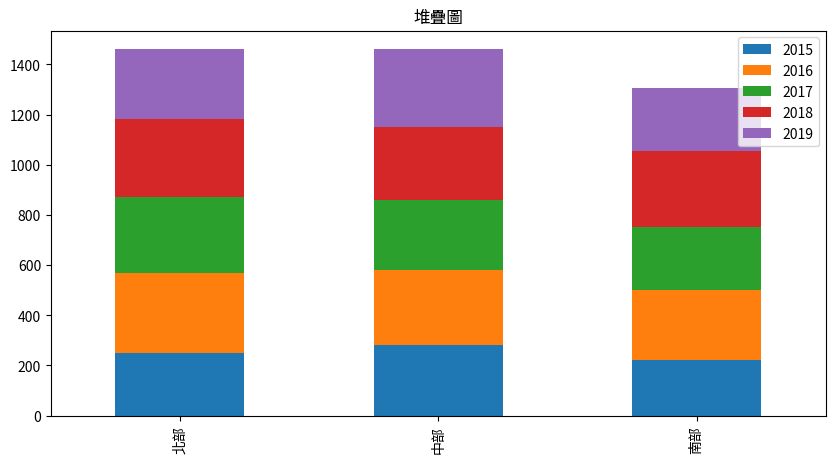

In [91]:
import pandas as pd
import matplotlib
from matplotlib.font_manager import fontManager

# 加入中文字型設定：Noto Sans TC
fontManager.addfont('/content/drive/MyDrive/Pandas/NotoSansTC-Regular.ttf')
matplotlib.rc('font', family='Noto Sans TC')

df = pd.DataFrame([[250,320,300,312,280],
							[280,300,280,290,310],
							[220,280,250,305,250]],
							index=['北部','中部','南部'],
							columns=[2015,2016,2017,2018,2019])

# g1 = df.plot(kind='bar', title='長條圖', figsize=[10,5])
# g2 = df.plot(kind='barh', title='橫條圖', figsize=[10,5])
g3 = df.plot(kind='bar', stacked=True, title='堆疊圖', figsize=[10,5])

## 繪製折線圖

In [ ]:
# import pandas as pd
# import matplotlib
# from matplotlib.font_manager import fontManager
# # 加入中文字型設定：翰字鑄造-台北黑體
# fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
# matplotlib.rc('font', family='Taipei Sans TC Beta')

df = pd.DataFrame([[250,320,300,312,280],
							[280,300,280,290,310],
							[220,280,250,305,250]],
							index=['北部','中部','南部'],
							columns=[2015,2016,2017,2018,2019])

g1 = df.iloc[0].plot(kind='line', legend=True,
							  xticks=range(2015,2020),
							  title='公司分區年度銷售表',
							  figsize=[10,5])
g1 = df.iloc[1].plot(kind='line',
							  legend=True,
							   xticks=range(2015,2020))
g1 = df.iloc[2].plot(kind='line',
									  legend=True,
									  xticks=range(2015,2020))

## 繪製圓餅圖

array([<Axes: ylabel='2015'>, <Axes: ylabel='2016'>,
       <Axes: ylabel='2017'>, <Axes: ylabel='2018'>,
       <Axes: ylabel='2019'>], dtype=object)

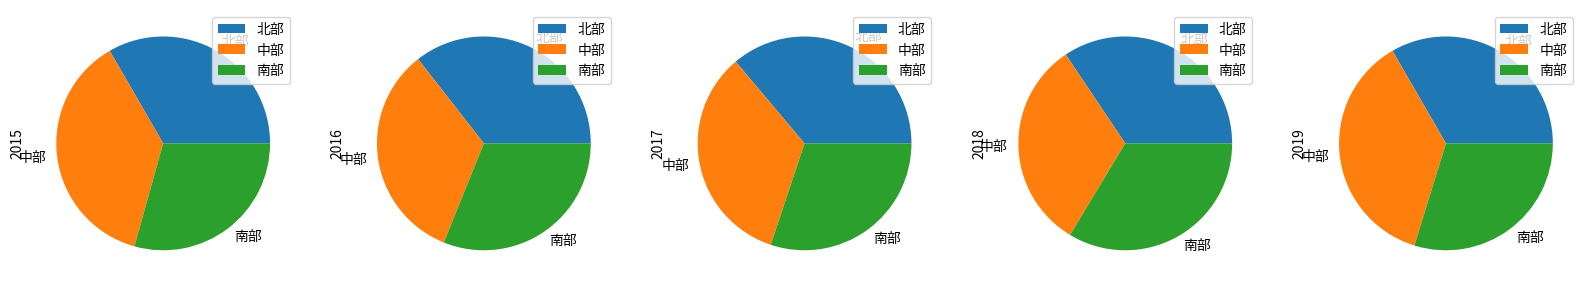

In [95]:
import pandas as pd
import matplotlib
from matplotlib.font_manager import fontManager
# 加入中文字型設定：翰字鑄造-台北黑體
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

df = pd.DataFrame([[250,320,300,312,280],
                   [280,300,280,290,310],
                   [220,280,250,305,250]],
                  index=['北部','中部','南部'],
                  columns=[2015,2016,2017,2018,2019])
df.plot(kind='pie', subplots=True, figsize=[20,20])